In [2]:
# Загрузка данныхx
import src.data as d
import src.drawer as drawer
import numpy as np
import math
import importlib
importlib.reload(d)

source_data, markers = d.load_data("data/ocr.dat", 8, False)
# source_data, markers = d.load_noise(100, 5)

# Попробовать очистить данные
source_data, markers = d.filter(source_data, markers, 2*math.sqrt(3))
print('filtered:', len(source_data[0]))

# Сортировка по дисперсии
source_std_dev = np.std(source_data,1)
d.sort(source_data, source_std_dev)

# Получаем ков. матрицу и собственные значения с векторами, сортируем
source_cov_mat = np.cov(source_data)
source_e_vals, source_e_vecs = np.linalg.eig(source_cov_mat)

file dim: 25
file len: 840
real len: 105
filtered: 80


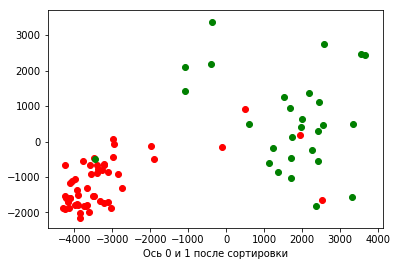

In [3]:
drawer.plot_2d(source_data, markers, 0,2, "Ось 0 и 1 после сортировки").show()

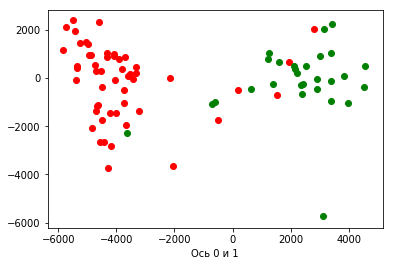


Квадрат относительной ошибки
1 : 0.9561
2 : 0.7828
3 : 0.6645
4 : 0.5864
5 : 0.5192
6 : 0.4660
7 : 0.4198
8 : 0.3820
9 : 0.3472
10 : 0.3144
11 : 0.2895
12 : 0.2646
13 : 0.2426
14 : 0.2208
15 : 0.1989
16 : 0.1761
17 : 0.1737
18 : 0.1696
19 : 0.1632
20 : 0.1423
21 : 0.1214
22 : 0.1020
23 : 0.0823
24 : 0.0587
25 : 0.0000


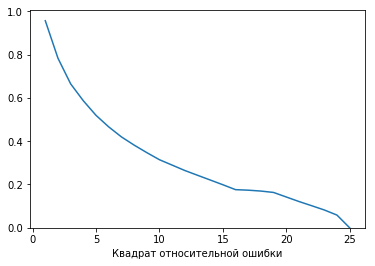

Размерность: 11


In [4]:
#PCA 
import src.pca as pca
importlib.reload(pca)

# Проекция
pca_data, pca_error = pca.calculate(source_data)
drawer.plot_2d(pca_data, markers, 0, 1, "Ось 0 и 1").show()

# Квадрат относительной ошибки
print("\nКвадрат относительной ошибки")
for i in range(len(pca_error)):
    print(i+1, ": %.4f" % pca_error[i])

drawer.plot_line(pca_error, label='Квадрат относительной ошибки').show()
print('Размерность:', d.real_dimensionality(pca_error, 0.3))

1..2..3..4..5..6..7..8..9..10..11..12..13..14..15..16..17..18..19..20..21..22..23..24..25..


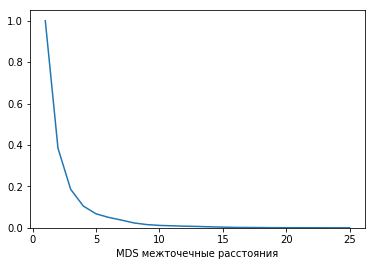

Размерность: 5


In [5]:
#MDS
import src.mds as mds
importlib.reload(mds)

mds_data_list = [] 
mds_distances = np.empty(len(source_data))
mds_prepared = mds.init(source_data)


for i in range(1, len(mds_distances)+1):
    print(i,end='..')
    proj, distance = mds_prepared.calculate(i)
    mds_data_list.append(proj)
    mds_distances[i-1] = distance
print()

mds_distances /= max(mds_distances)
drawer.plot_line(mds_distances, label='MDS межточечные расстояния').show()
print("Размерность:", d.real_dimensionality(mds_distances, 0.1))

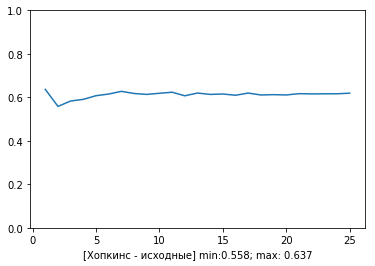

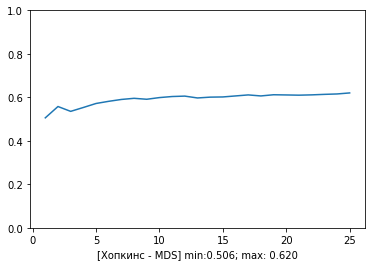

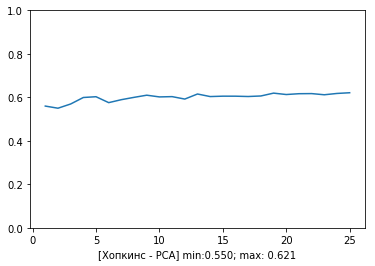

In [6]:
# Хопкинс
import src.hopkins as hopkins
importlib.reload(hopkins)

source_hopkins = []
mds_hopkins = []
pca_hopkins = []

for i in range(1, len(source_data)+1): 
    source_hopkins.append(hopkins.calculate(source_data[:i]))
    mds_hopkins.append(hopkins.calculate(mds_data_list[i-1]))
    pca_hopkins.append(hopkins.calculate(pca_data[:i]))


src_hopkins_label = '[Хопкинс - исходные] min:' + '%.3f' % min(source_hopkins) +'; max: ' + '%.3f' % max(source_hopkins)
drawer.plot_line(source_hopkins, label=src_hopkins_label, top=1).show()

mds_hopkins_label = '[Хопкинс - MDS] min:' + '%.3f' % min(mds_hopkins) +'; max: ' + '%.3f' % max(mds_hopkins)
drawer.plot_line(mds_hopkins, label=mds_hopkins_label, top=1).show()

pca_hopkins_label = '[Хопкинс - PCA] min:' + '%.3f' % min(pca_hopkins) +'; max: ' + '%.3f' % max(pca_hopkins)
drawer.plot_line(pca_hopkins, label=pca_hopkins_label, top=1).show()

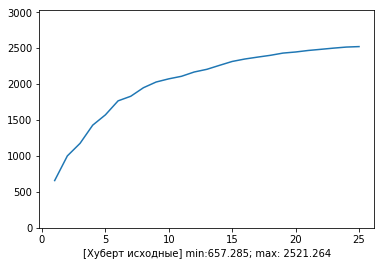

In [34]:
# Хуберт
"""
Почему при нормировании по дисперсии наблюдается линейный рост:
Потому что с добавлением новых призноков снижается std -> при делении точки располагаются дальше -> межточечное расстояние растет

Почему помогает нормализация по дистанции:
Т.к. межточечное расстояние растет растет и max(dist)



"""

import src.hubert as hubert
importlib.reload(hubert)

source_hubert = []
mds_hubert = []
pca_hubert = []

for i in range(1, len(source_data)+1):
    source_hubert.append(hubert.calculate(source_data[:i], markers))
    # mds_hubert.append(hubert.calculate(mds_data_list[i-1], markers))
    # pca_hubert.append(hubert.calculate(pca_data[:i], markers))



hubert_top = np.max(source_hubert) * 1.2
src_hubert_label = '[Хуберт исходные] min:' + '%.3f' % min(source_hubert) +'; max: ' + '%.3f' % max(source_hubert)
drawer.plot_line(source_hubert, label=src_hubert_label, top=hubert_top).show()

# mds_hubert_label = '[Хуберт MDS] min:' + '%.3f' % min(mds_hubert) +'; max: ' + '%.3f' % max(mds_hubert)
# drawer.plot_line(mds_hubert, label=mds_hubert_label, top=hubert_top).show()

# pca_hubert_label = '[Хуберт PCA] min:' + '%.3f' % min(pca_hubert) +'; max: ' + '%.3f' % max(pca_hubert)
# drawer.plot_line(pca_hubert, label=pca_hubert_label, top=hubert_top).show()

var:1.000; std 1.000; mean 0.000


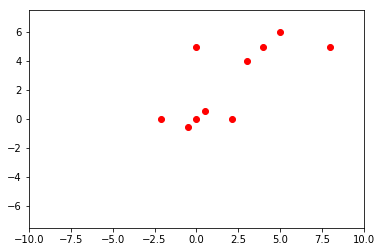

In [8]:
def draw(p):
    plt = drawer.plot_2d(p, np.ones(len(p[0])), 0, 1)
    plt.xlim(-10,10)
    plt.ylim(-7.5,7.5)

points = np.empty((2,5))
points[0] = [5, 8, 3, 0, 4]  # x 
points[1] = [6, 5, 4, 5, 5] # y

# points[0] += 0
# points[1] += 0

# points = source_data[:2].copy()

draw(points)

points_copy = points.copy()

for i in range(len(points_copy)):
    points_copy[i] -= np.mean(points_copy[i])
points_copy /= np.std(points_copy)

draw(points_copy)
print('var:%.3f; std %.3f; mean %.3f' % (np.var(points_copy), np.std(points_copy), np.mean(points_copy)))